In [1]:
# 1a
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('/content/train-val.csv')


In [2]:
# 2a
# Print the number of samples (rows) and features (columns)
print(f'Number of samples: {df.shape[0]}')
print(f'Number of features: {df.shape[1]}')

Number of samples: 7262
Number of features: 24


In [3]:
# 2b

# Checking the data type of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             7262 non-null   int64  
 1   Date           7262 non-null   object 
 2   Location       7262 non-null   object 
 3   MinTemp        7237 non-null   float64
 4   MaxTemp        7251 non-null   float64
 5   Rainfall       7262 non-null   float64
 6   Evaporation    4223 non-null   float64
 7   Sunshine       3817 non-null   float64
 8   WindGustDir    6787 non-null   object 
 9   WindGustSpeed  6789 non-null   float64
 10  WindDir9am     6692 non-null   object 
 11  WindDir3pm     7049 non-null   object 
 12  WindSpeed9am   7207 non-null   float64
 13  WindSpeed3pm   7128 non-null   float64
 14  Humidity9am    7185 non-null   float64
 15  Humidity3pm    7094 non-null   float64
 16  Pressure9am    6576 non-null   float64
 17  Pressure3pm    6575 non-null   float64
 18  Cloud9am

In [4]:
# 2c

# Print the attribute labels
print("Attribute labels:")
print(df.columns.tolist())

Attribute labels:
['ID', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [5]:
# 2d

# Calculate the number of categories
categories_count = df['RainTomorrow'].nunique()

print("Number of categories for 'target' =", (categories_count))


Number of categories for 'target' = 2


In [6]:
# 2e

# Calculation of the number of samples for each category in RainTomorrow
samples_count = df['RainTomorrow'].value_counts()

print("Number of samples in each category of", samples_count)

Number of samples in each category of RainTomorrow
0    5623
1    1639
Name: count, dtype: int64


In [7]:
# 2st
# We remove non-numeric features
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculation of correlation
correlation_matrix = numeric_df.corr()

correlation_matrix

,ID,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
ID,1.000000,0.101510,0.133521,-0.032217,0.071010,0.051325,0.043297,0.069138,0.030900,-0.117635,-0.075666,-0.084635,-0.089954,-0.071564,-0.064091,0.136345,0.125620,-0.008100,-0.000595
MinTemp,0.101510,1.000000,0.709894,0.093915,0.460272,0.064273,0.165904,0.199696,0.192065,-0.227187,0.023297,-0.366575,-0.378641,0.056189,-0.000523,0.888775,0.679368,0.064523,0.076245
MaxTemp,0.133521,0.709894,1.000000,-0.098454,0.571740,0.469705,0.008927,0.009758,0.057063,-0.485498,-0.493780,-0.217367,-0.326057,-0.315717,-0.314760,0.881857,0.983124,-0.240200,-0.175112
Rainfall,-0.032217,0.093915,-0.098454,1.000000,-0.074776,-0.182762,0.182268,0.127017,0.093557,0.204239,0.235734,-0.192867,-0.133201,0.188081,0.165398,-0.009739,-0.100264,0.508495,0.206823
Evaporation,0.071010,0.460272,0.571740,-0.074776,1.000000,0.348179,0.168108,0.207150,0.135517,-0.502250,-0.373950,-0.208560,-0.244390,-0.193750,-0.196783,0.552718,0.558556,-0.178420,-0.111138
Sunshine,0.051325,0.064273,0.469705,-0.182762,0.348179,1.000000,-0.068132,0.020779,0.047236,-0.463217,-0.621705,0.093877,0.025512,-0.690637,-0.715964,0.295746,0.494379,-0.283477,-0.433374
WindGustSpeed,0.043297,0.165904,0.008927,0.182268,0.168108,-0.068132,1.000000,0.630244,0.706897,-0.218186,0.008154,-0.496235,-0.445468,0.087869,0.140471,0.127086,-0.028502,0.201441,0.291813
WindSpeed9am,0.069138,0.199696,0.009758,0.127017,0.207150,0.020779,0.630244,1.000000,0.543124,-0.299031,-0.033898,-0.263245,-0.209356,0.034047,0.061122,0.144137,-0.006178,0.127078,0.109336
WindSpeed3pm,0.030900,0.192065,0.057063,0.093557,0.135517,0.047236,0.706897,0.543124,1.000000,-0.167797,0.002906,-0.335823,-0.297948,0.063603,0.059018,0.176276,0.028872,0.119698,0.137652
Humidity9am,-0.117635,-0.227187,-0.485498,0.204239,-0.502250,-0.463217,-0.218186,-0.299031,-0.167797,1.000000,0.647581,0.124066,0.179100,0.442494,0.366222,-0.475319,-0.475040,0.333259,0.230218


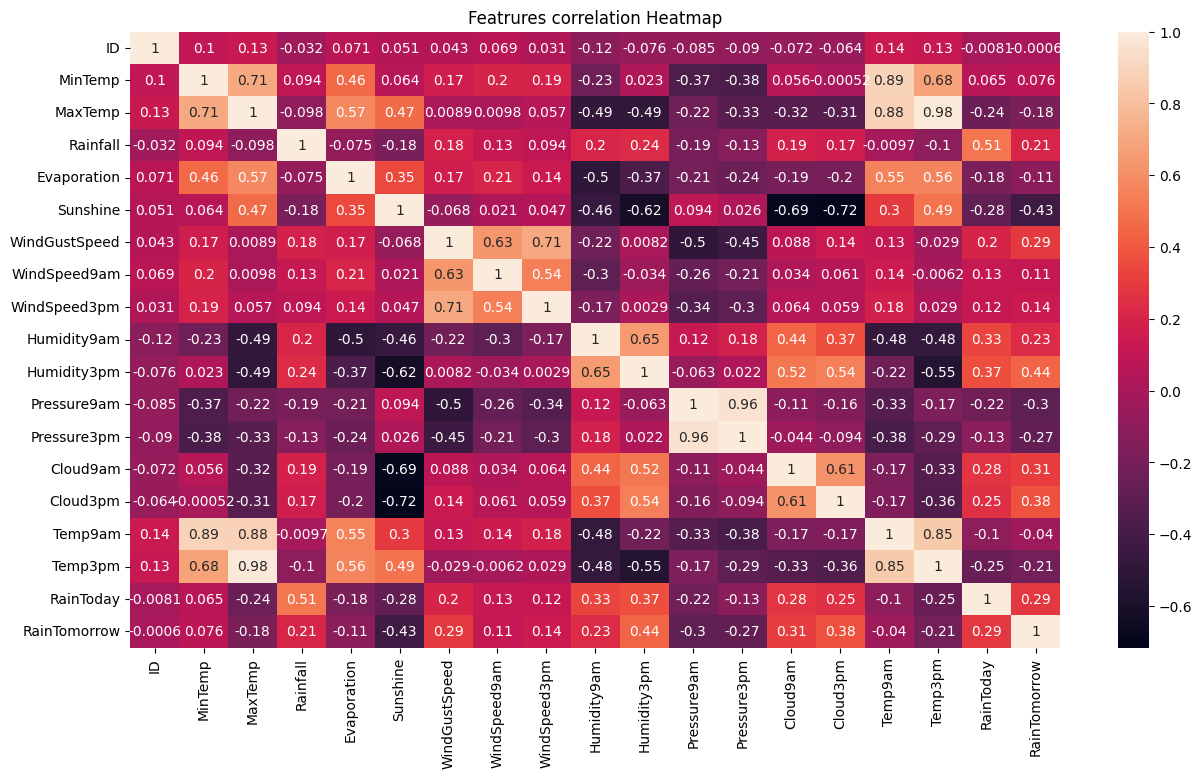

In [8]:
# 2z.1
import seaborn as sns
# Creation of heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Featrures correlation Heatmap')
plt.show()

x axis: column values
y axis: number of samples belonging to each bin
bins: how many equal intervals each graph is divided into

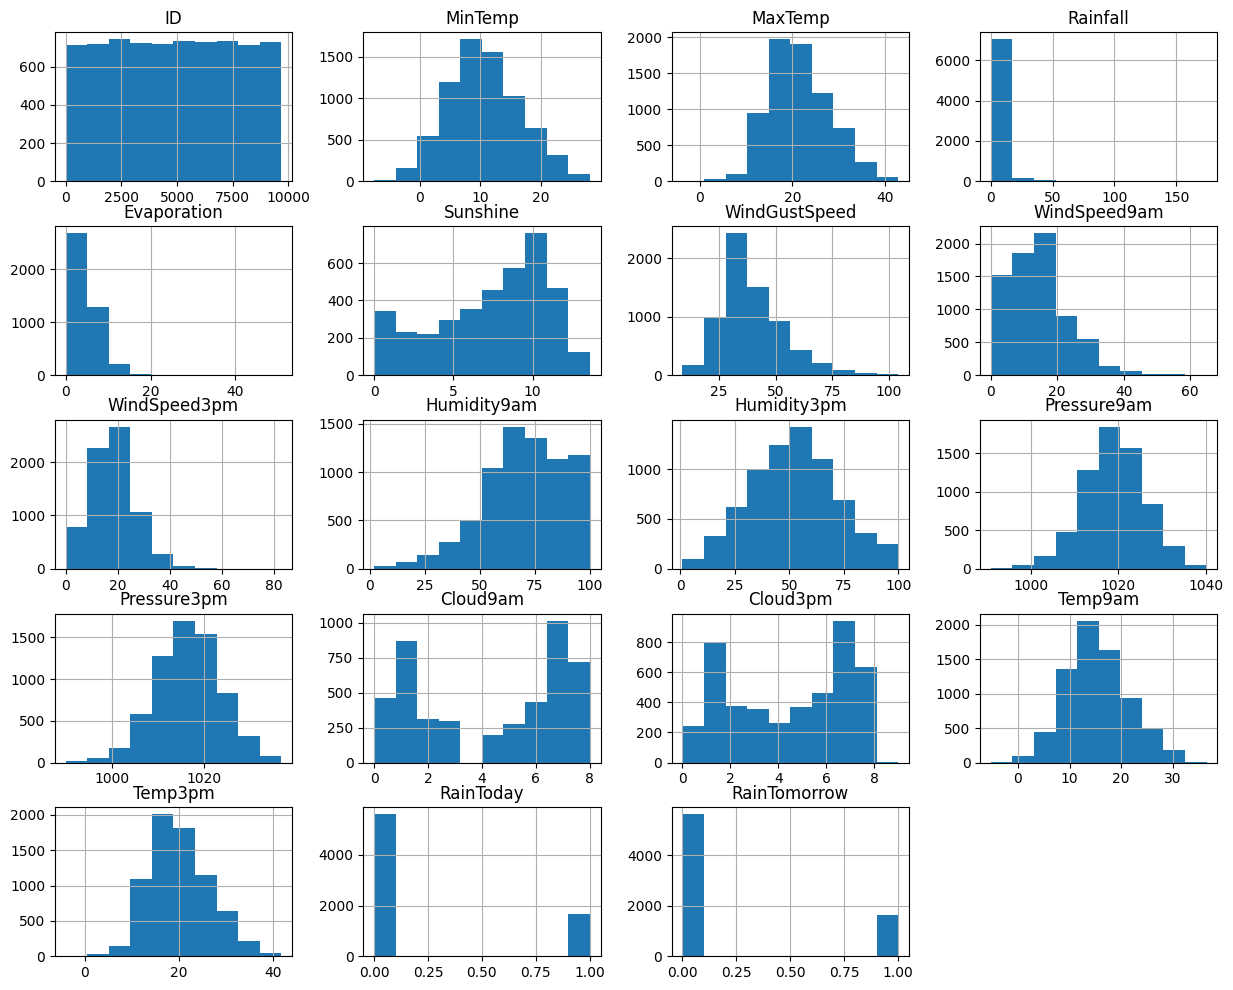

In [9]:
# 2z.2
# Visualization of the data set
import matplotlib.pyplot as plt
# Binning 10
import matplotlib.pyplot as plt
df.hist(bins=10, figsize=(15, 12))
plt.show()

<Figure size 700x400 with 0 Axes>

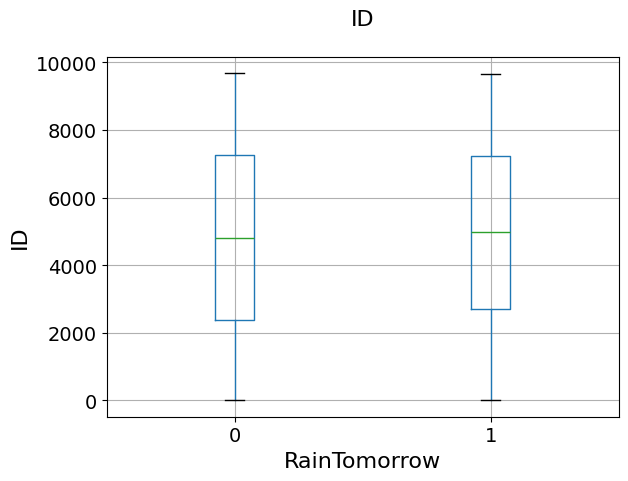

<Figure size 700x400 with 0 Axes>

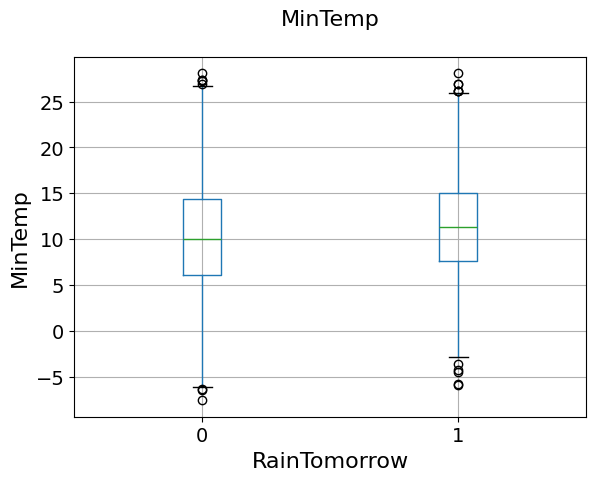

<Figure size 700x400 with 0 Axes>

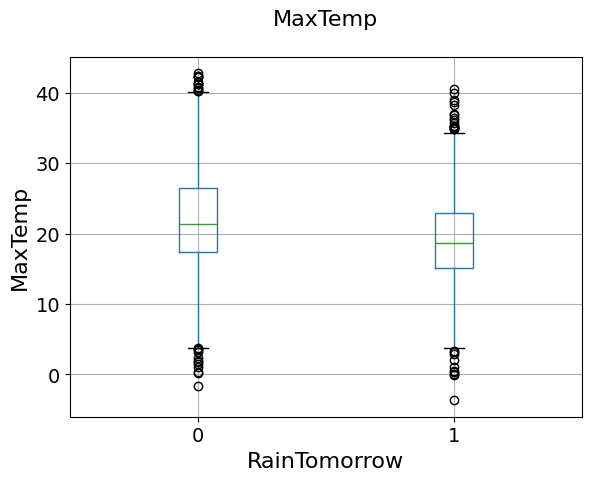

<Figure size 700x400 with 0 Axes>

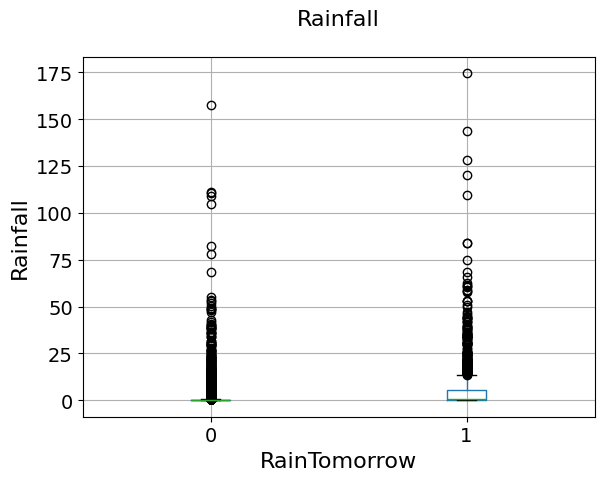

<Figure size 700x400 with 0 Axes>

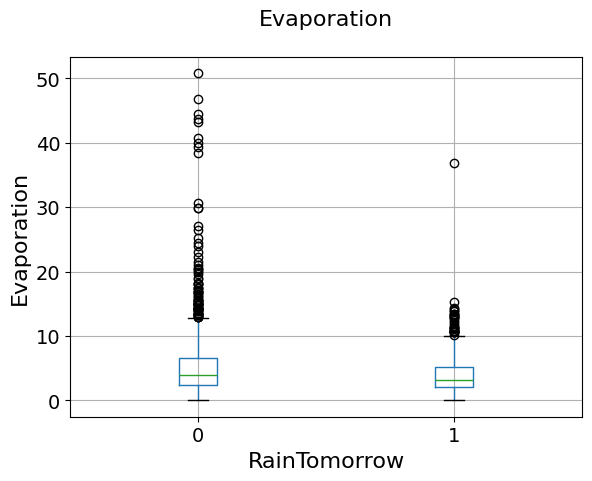

<Figure size 700x400 with 0 Axes>

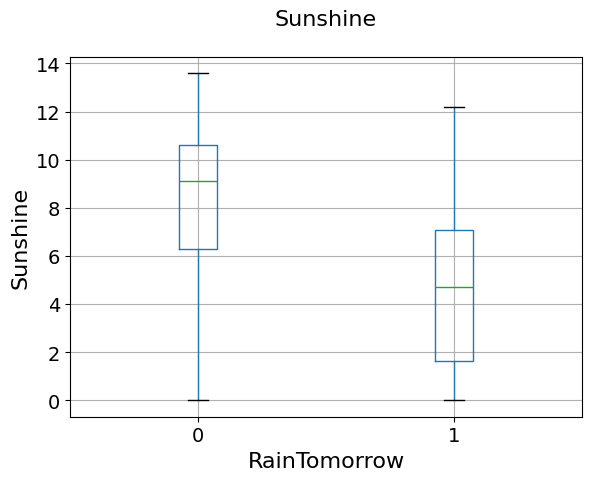

<Figure size 700x400 with 0 Axes>

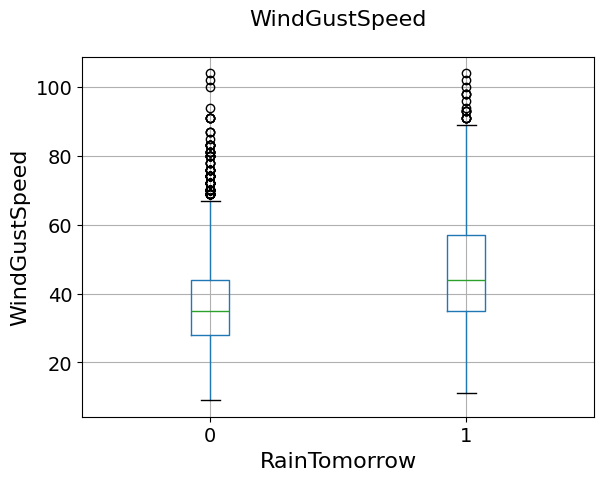

<Figure size 700x400 with 0 Axes>

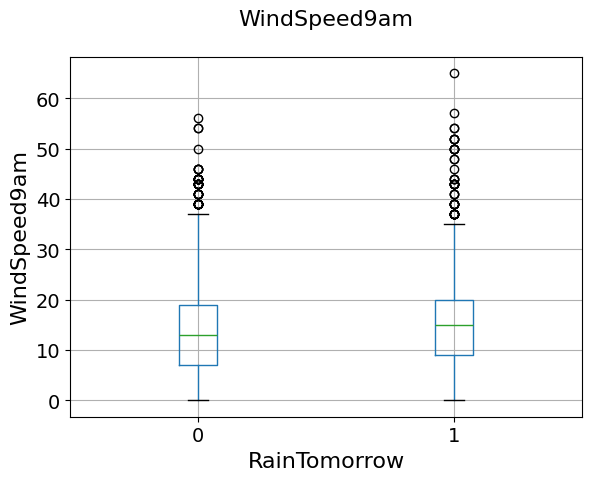

<Figure size 700x400 with 0 Axes>

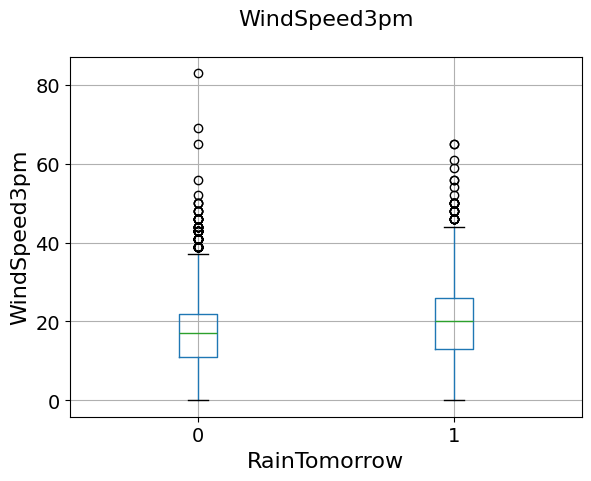

<Figure size 700x400 with 0 Axes>

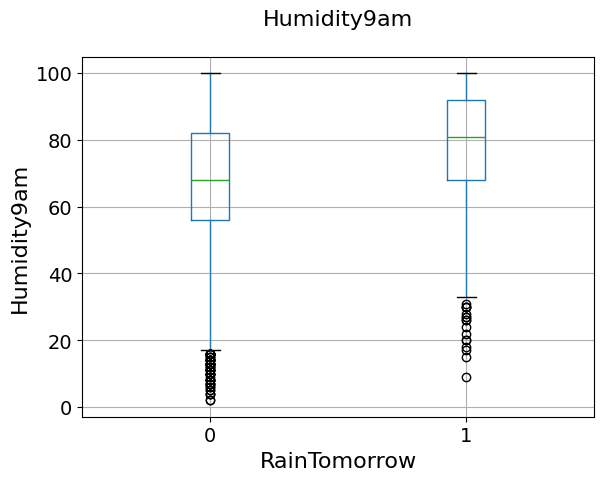

<Figure size 700x400 with 0 Axes>

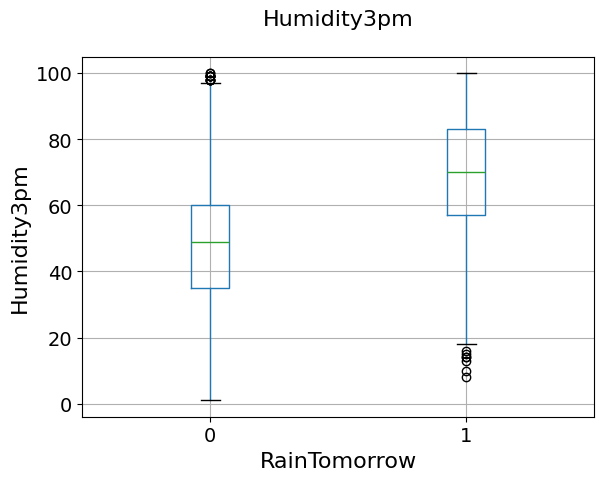

<Figure size 700x400 with 0 Axes>

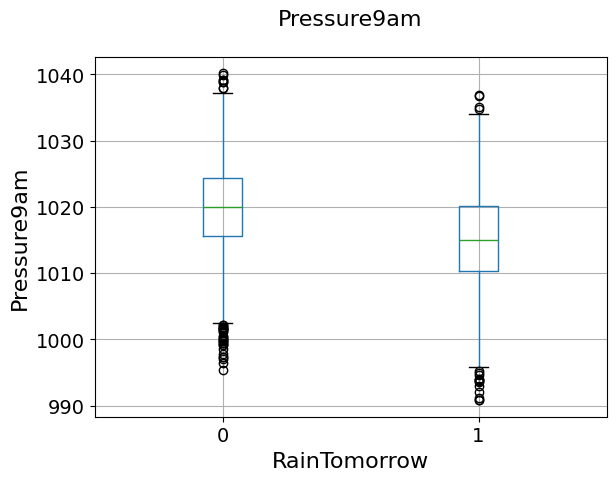

<Figure size 700x400 with 0 Axes>

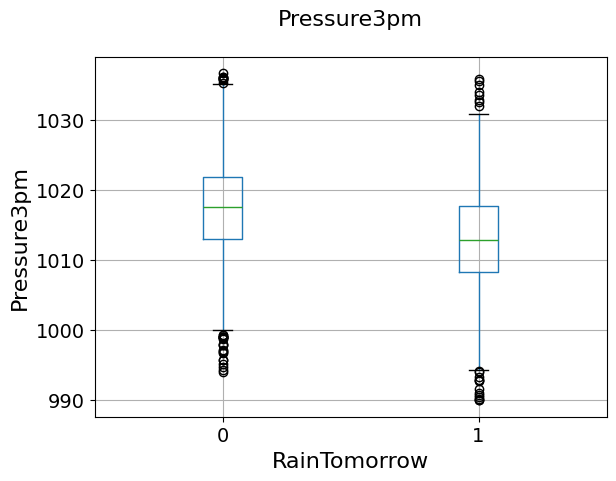

<Figure size 700x400 with 0 Axes>

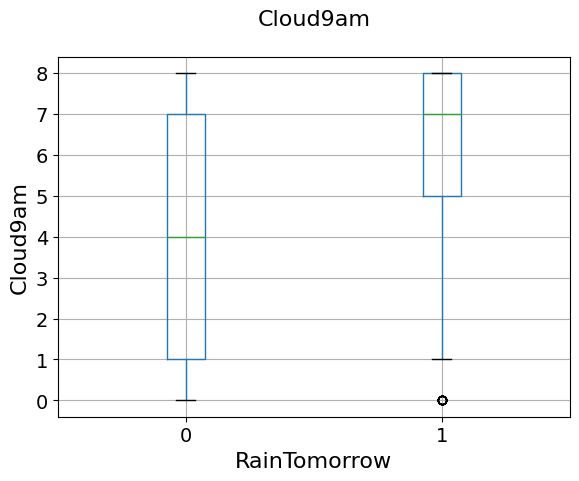

<Figure size 700x400 with 0 Axes>

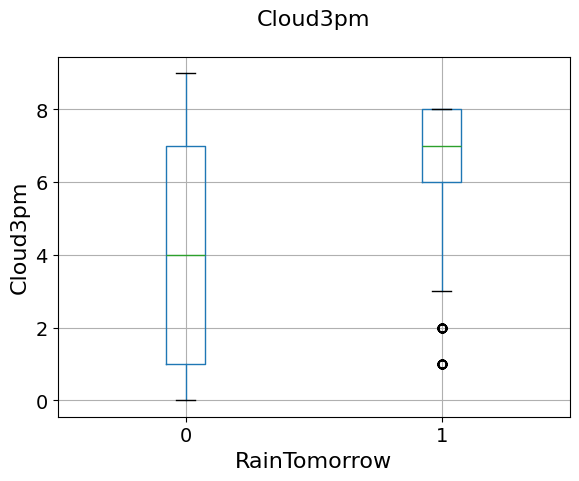

<Figure size 700x400 with 0 Axes>

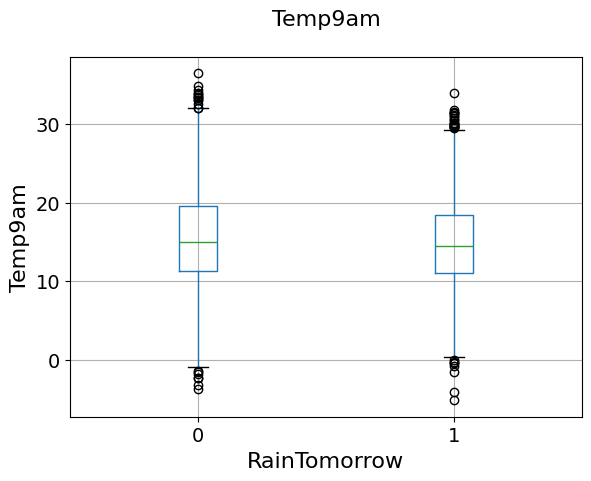

<Figure size 700x400 with 0 Axes>

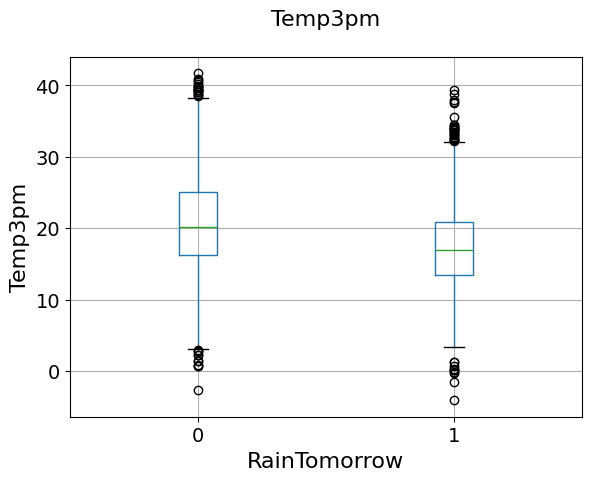

<Figure size 700x400 with 0 Axes>

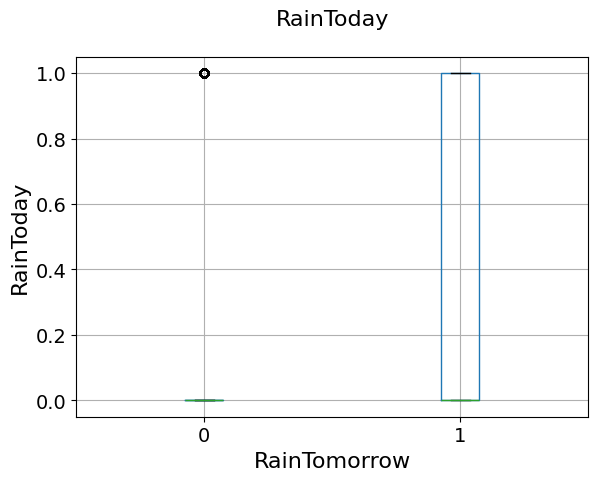

<Figure size 700x400 with 0 Axes>

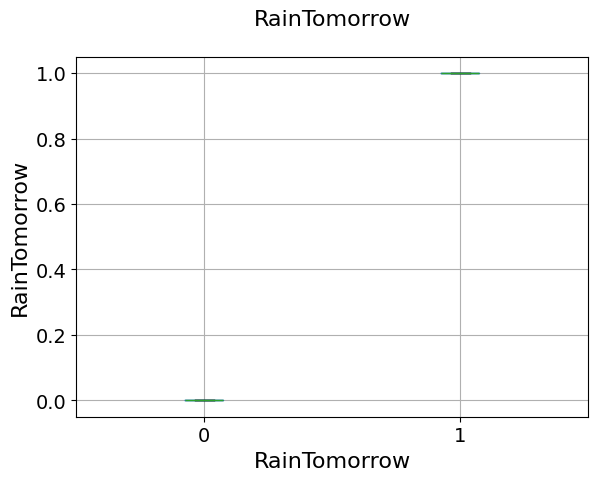

In [10]:
# 2z.3
# Create boxplots for each numeric column against RainTomorrow
for c in numeric_df.columns:
    plt.figure(figsize=(7, 4))
    df.boxplot(column=c, by='RainTomorrow', fontsize=14)
    plt.title("{}\n".format(c), fontsize=16)
    plt.suptitle("")  # We remove the default title from the boxplot
    plt.xlabel("RainTomorrow", fontsize=16)
    plt.ylabel(c, fontsize=16)
    plt.show()

In [11]:
# 3a

# Convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # errors='coerce' option forces pandas to set NaT (Not a Time) for invalid dates instead of throwing an error
# Create Month column from date
df['Month'] = df['Date'].dt.month

# Τemperature variation during the day
df['TempDiff'] = df['MaxTemp'] - df['MinTemp']

# Change in humidity during the day
df['HumidityDiff'] = df['Humidity3pm'] - df['Humidity9am']

# Change in pressure during the day
df['PressureDiff'] = df['Pressure3pm'] - df['Pressure9am']

# change in cloud coverage during the day
df['CloudDiff'] = df['Cloud3pm'] - df['Cloud9am']

# Remove unnecessary columns from the dataset
df = df.drop(columns=['Date', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
                      'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'])

print(df.columns)


Index(['ID', 'Location', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Month', 'TempDiff', 'HumidityDiff', 'PressureDiff', 'CloudDiff'],
      dtype='object')


In [12]:
# 3a

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7262 entries, 0 to 7261
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             7262 non-null   int64  
 1   Location       7262 non-null   object 
 2   Rainfall       7262 non-null   float64
 3   Evaporation    4223 non-null   float64
 4   Sunshine       3817 non-null   float64
 5   WindGustDir    6787 non-null   object 
 6   WindGustSpeed  6789 non-null   float64
 7   WindDir9am     6692 non-null   object 
 8   WindDir3pm     7049 non-null   object 
 9   WindSpeed9am   7207 non-null   float64
 10  WindSpeed3pm   7128 non-null   float64
 11  Temp9am        7228 non-null   float64
 12  Temp3pm        7142 non-null   float64
 13  RainToday      7262 non-null   int64  
 14  RainTomorrow   7262 non-null   int64  
 15  Month          7262 non-null   int32  
 16  TempDiff       7230 non-null   float64
 17  HumidityDiff   7066 non-null   float64
 18  Pressure

In [13]:
# 3b

# Detect missing values ​​per column
missing_values = df.isnull().sum()
print("Missing values ​​per column:")
print(missing_values[missing_values > 0])

# Replace missing values
# Replace with mean for numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Replace with the most frequent value for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Confirm that there are no more missing values
print("\nCheck that there are no more missing values:")
print(df.isnull().sum().sum())  # Should return 0 if all missing values ​​have been handled

Missing values ​​per column:
Evaporation      3039
Sunshine         3445
WindGustDir       475
WindGustSpeed     473
WindDir9am        570
WindDir3pm        213
WindSpeed9am       55
WindSpeed3pm      134
Temp9am            34
Temp3pm           120
TempDiff           32
HumidityDiff      196
PressureDiff      692
CloudDiff        3041
dtype: int64

Check that there are no more missing values:
0


In [14]:
# 3c

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# handle categorical features
categorical_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])  # we need dense not sparse matrix for the p

Comments: encoding categorical data in binary formats (separate columns)
handle_uknown = 'ignore' # If unknown categories are found in the prediction data, the model will ignore them instead of failing
sparse_output = False # Output should be in dense format because using pandas and other libraries does not support sparse tables

In [15]:
# 3d

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# handle numeric features
numeric_features = ['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Month', 'TempDiff', 'HumidityDiff', 'PressureDiff', 'CloudDiff']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

Comments: StandardScaler() : normalization between 0 and 1

In [16]:
# 3e

from sklearn.compose import ColumnTransformer
# Create a transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Apply the preprocessor to the dataset
# Transform DataFrame and save to new clean DataFrame for training
df_cleaned = preprocessor.fit_transform(df)

# Convert the result to a DataFrame with correct column names
# Get the names of the new features
feature_names = (numeric_features +
                 list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)))
df_cleaned = pd.DataFrame(df_cleaned, columns=feature_names)

# We add the target column "RainTomorrow" to the clean DataFrame
df_cleaned['RainTomorrow'] = df['RainTomorrow'].values

Comments: get_feature_names_out(): Outputs the names of new features created by one-hot encoding on categorical data.

In [19]:
# 3st

# X contains all attributes except the label (RainTomorrow)
X = df_cleaned.drop('RainTomorrow', axis=1)

# y is the target column, RainTomorrow
y = df_cleaned['RainTomorrow']

In [20]:
# 3z

from sklearn.model_selection import train_test_split
# Split into training (70%) and validation (30%) set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# 4a

# Import the necessary classifiers from scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
# Definition of classifiers
classifiers = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'MLP': MLPClassifier(max_iter=2000, random_state=42),  # We increase max_iter to ensure convergence
    'SVC': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Training and display of labeled samples
for name, classifier in classifiers.items():
    print(f"\nTraining {name}...")

    # Training the classifier with the already preprocessed data
    classifier.fit(X_train, y_train)
    # Save the trained classifier
    classifiers[name] = classifier

    # Display the first 5 samples of the training set
    print("Sample Training Data with Labels:")
    for i in range(5):
        print(f"Input: {X_train.iloc[i].values}, Label: {y_train.iloc[i]}")


Training Naive Bayes...
Sample Training Data with Labels:
Input: [-2.86884692e-01 -1.42906266e+00 -2.86726060e+00 -5.30780935e-16
 -7.51282409e-01 -1.27935000e+00 -2.18669698e-01 -3.77199972e-01
 -5.44780428e-01  6.46693414e-03 -7.72786722e-01  8.01962143e-01
 -1.71104098e+00  4.75419358e-01  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.0000

In [22]:
# 4b

# Save predictions for each model
predictions = {}

# Prediction for each trained classifier
for name, classifier in classifiers.items():
    # Prediction in the validation set
    y_pred = classifier.predict(X_val)
    predictions[name] = y_pred

In [ ]:
# 4c

from sklearn.metrics import f1_score

# Saving the F1 score results for each classifier
f1_scores = {}

# Calculation of the F1 score
for name, y_pred in predictions.items():
    f1 = f1_score(y_val, y_pred)
    f1_scores[name] = f1
    print(f"{name} F1 Score: {f1:.4f}")

Naive Bayes F1 Score: 0.4295
KNN F1 Score: 0.4545
Logistic Regression F1 Score: 0.5492
MLP F1 Score: 0.5446
SVC F1 Score: 0.5309
Decision Tree F1 Score: 0.4255
Random Forest F1 Score: 0.4980


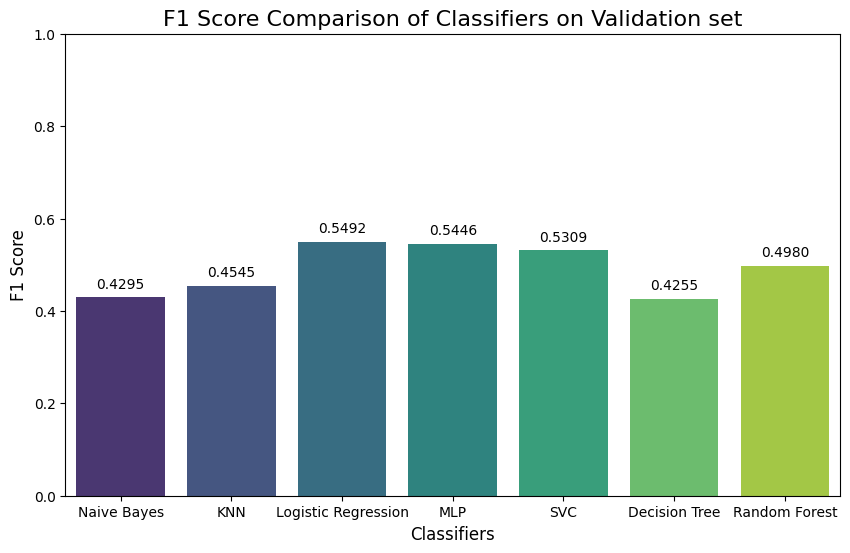

In [ ]:
# 4d

import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the results with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), hue=list(f1_scores.keys()), dodge=False, palette='viridis', legend=False)

plt.title('F1 Score Comparison of Classifiers on Validation set', fontsize=16)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0, 1)  # The F1 score ranges between 0 and 1

# Show F1 values ​​above the bars
for i, score in enumerate(f1_scores.values()):
    plt.text(i, score + 0.02, f'{score:.4f}', ha='center', fontsize=10)

plt.show()


In [ ]:
# 5a

import pandas as pd

# Load the test set
test_df = pd.read_csv('test.csv')

# Extract the 'ID' column from the test set
test_ids = test_df['ID']

# Apply preprocessing to the test set
# Convert the 'Date' column to datetime and create the 'Month' column
test_df['Date'] = pd.to_datetime(test_df['Date'], errors='coerce')
test_df['Month'] = test_df['Date'].dt.month

# Create new features based on temperature, humidity, pressure, and cloud coverage
test_df['TempDiff'] = test_df['MaxTemp'] - test_df['MinTemp']
test_df['HumidityDiff'] = test_df['Humidity3pm'] - test_df['Humidity9am']
test_df['PressureDiff'] = test_df['Pressure3pm'] - test_df['Pressure9am']
test_df['CloudDiff'] = test_df['Cloud3pm'] - test_df['Cloud9am']

# Removing unnecessary columns, as we did in the training set
test_df = test_df.drop(columns=['Date', 'MinTemp', 'MaxTemp', 'Humidity9am', 'Humidity3pm',
                                'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'])

# Apply preprocessing to test set features
# We use the preprocessor we defined before
X_test_processed = preprocessor.transform(test_df)

# Convert X_test_processed to DataFrame with correct column names
feature_names = (numeric_features +
                 list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)))
X_test = pd.DataFrame(X_test_processed, columns=feature_names)

# Prediction with the trained Logistic Regression model
best_model = classifiers['Logistic Regression']
y_test_pred = best_model.predict(X_test)

# Display the first 5 predictions in the test set
print("Predictions on Test Set (first 5 samples):")
print(y_test_pred[:5])

Predictions on Test Set (first 5 samples):
[0 0 0 0 0]


In [ ]:
# 5b

# Create a DataFrame with the predictions and the 'ID' column
output = pd.DataFrame({'ID': test_ids, 'Prediction': y_test_pred})

# Save the file to CSV
output.to_csv('test_predictions.csv', index=False)


In [ ]:
# 6a

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for each classifier
param_grids = {
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7]   # εξομάλυνση εκτιμήσεων πιθανοτήτων για αποφυγή διαίρεσης με μηδέν όταν οι πιθ ειναι πολύ χαμηλές (για χαμηλή διασπορά)
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],   # αριθμός γειτόνων που λαμβάνονται υπόψη για τη ταξινόμηση νέου δείγματος (μικρό k -> Λεπτομερής ταξινόμηση) (μεγάλο k -> γενίκευση)
        'weights': ['uniform', 'distance'], # τρόπος υπολογισμού σημαντικότητας γειτόνων (uniform -> όλοι γείτονες ίσο βάρος) (distance -> κοντινότεροι μεγαλύτερο βάρος)
        'metric': ['euclidean', 'manhattan'] # μετρική απόστασης γειτόνων (mahattan -> αθροιστική απόσταση ανά άξονα)
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],  # πολυπλοκότητα μοντέλου (μικρά C -> περισσότερη κανονικοποίηση, απλούστερο μοντέλο, λιγότερο overfitting) (μεγάλα C -> λιγότερη καν/ση, πιο σύνθετο)
        'solver': ['lbfgs', 'liblinear'] # αλγόριθμος βελτιστοποίησης (lbfgs -> για μικρά έως μεσαία datasets) (liblinear -> για δυαδική ταξινόμηση και αραιά δεδομένα)
    },
    'MLP': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)], # πλήθος και μέγεθος κρυφών επιπέδων ((50,) -> 1 επίπεδο 50 νευρώνες)
        'activation': ['tanh', 'relu'],  # συνάρτηση ενεργοποίησης (tanh -> υπερβολική εφαπτομένη (κατάλ. για μη γραμμικά δεδ.)) (relu -> rectified linear unit)
        'alpha': [0.0001, 0.001], # ρυθμιστής L2 κανονικοποίησης -> ελέγχει την υπερπροσαρμογή
        'learning_rate': ['constant', 'adaptive'] # ρυθμός εκμάθησης (constant -> σταθερή τιμή σε όλη την εκπ.) (adaptive -> μειώνεται αν η αποδ. δεν βελτιώνεται)
    },
    'SVC': {
        'C': [0.1, 1, 10],  # Ελέγχει το trade-off μεταξύ μεγάλου περιθωρίου και σωστής ταξινόμησης (μικρά C -> περισσότερα λάθη, μεγαλύτερο περιθώριο) (μεγάλα C -> λιγότερα λαθη, στενό περ.)
        'kernel': ['linear', 'rbf'], # πυρήνας καθορίζει τη μετασχηματιστική συνάρτηση (linear -> γραμμικός διαχωρισμός) (rbf -> μη γραμμικός διαχωρισμός(Radial Basis Function))
        'gamma': ['scale', 'auto'] # ακτίνα επιρροής κάθε δείγματος (scale -> αυτόματη προσαρμογή με βάση τα χαρ.) (auto -> εξαρτάται από τον αριθμό των χαρ.)
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30], # μέγιστο βάθος δέντρου, ελέγχει την πολυπολοκότητα (None -> χωρίς περιορισμό βάθους)
        'min_samples_split': [2, 5, 10]  # ελάχιστος αριθμός δειγμάτων που απαιτείται για να διαχωριστεί ένας κόμβος (μεγαλύτερες τιμές -> μειώνουν πολυπλοκότητα)
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200], # αριθμός δέντρων στο δάσος
        'max_features': [None, 'sqrt', 'log2'], # αριθμός χαρακτηριστικών που εξετάζονται σε κάθε διαχωρισμό (None:όλα τα χαρακτηριστικά)(sqrt: τετραγ. ρίζα των χαρ.)(log2: λογαριθμική βάση 2)
        'max_depth': [None, 10, 20] # μέγιστο βάθος δέντρων ελέγχει πολυπλοκότητα
    }
}

# Saving the best models
best_classifiers = {}

# Grid search for each classifier
for name, classifier in classifiers.items():
    print(f"\nOptimizing {name}...")

    # GridSearchCV definition with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=classifier,
                               param_grid=param_grids[name],
                               scoring='f1',  # Select F1 score for evaluation
                               cv=5,  # 5-fold cross-validation
                               n_jobs=-1)  # Use all available CPUs

   # Run the search on the training set
    grid_search.fit(X_train, y_train)

    # Save the optimal model
    best_classifiers[name] = grid_search.best_estimator_

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1 score for {name}: {grid_search.best_score_:.4f}")



Optimizing Naive Bayes...
Best parameters for Naive Bayes: {'var_smoothing': 1e-07}
Best F1 score for Naive Bayes: 0.4419

Optimizing KNN...
Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best F1 score for KNN: 0.4920

Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best F1 score for Logistic Regression: 0.5565

Optimizing MLP...
Best parameters for MLP: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
Best F1 score for MLP: 0.5746

Optimizing SVC...
Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 score for SVC: 0.5736

Optimizing Decision Tree...
Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 5}
Best F1 score for Decision Tree: 0.4889

Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'max_features': None, 'n_estimators': 50}
Best F1 score for Ran

In [ ]:
# 6b

# Dictionary to store the predictions in the validation set for each optimal model
validation_predictions = {}

# Apply predict to the validation set for each classifier
for name, best_model in best_classifiers.items():
    print(f"\nPredicting on validation set with {name}...")

    # Prediction in validation set (X_val)
    y_val_pred = best_model.predict(X_val)

    # Saving the predictions in the dictionary
    validation_predictions[name] = y_val_pred

    # Show the first 5 predictions for confirmation
    print(f"First 5 predictions for {name}: {y_val_pred[:5]}")



Predicting on validation set with Naive Bayes...
First 5 predictions for Naive Bayes: [1 0 0 0 1]

Predicting on validation set with KNN...
First 5 predictions for KNN: [0 0 0 1 1]

Predicting on validation set with Logistic Regression...
First 5 predictions for Logistic Regression: [0 0 0 1 0]

Predicting on validation set with MLP...
First 5 predictions for MLP: [0 0 0 1 0]

Predicting on validation set with SVC...
First 5 predictions for SVC: [0 0 0 0 0]

Predicting on validation set with Decision Tree...
First 5 predictions for Decision Tree: [0 0 0 0 0]

Predicting on validation set with Random Forest...
First 5 predictions for Random Forest: [0 0 0 1 0]


In [ ]:
# 6c

from sklearn.metrics import f1_score

# Evaluate the performance of each optimal model in the validation set
f1_scores = {}

for name, y_val_pred in validation_predictions.items():
    # Calculation of F1 score
    f1 = f1_score(y_val, y_val_pred)

    # Save the F1 score for each model
    f1_scores[name] = f1

    # Display the F1 score for each model
    print(f"{name} F1 Score: {f1:.4f}")

# Find the model with the highest F1 score
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest model based on F1 Score: {best_model_name} with F1 Score: {f1_scores[best_model_name]:.4f}")


Naive Bayes F1 Score: 0.4295
KNN F1 Score: 0.4785
Logistic Regression F1 Score: 0.5459
MLP F1 Score: 0.5532
SVC F1 Score: 0.5239
Decision Tree F1 Score: 0.4391
Random Forest F1 Score: 0.5228

Best model based on F1 Score: MLP with F1 Score: 0.5532


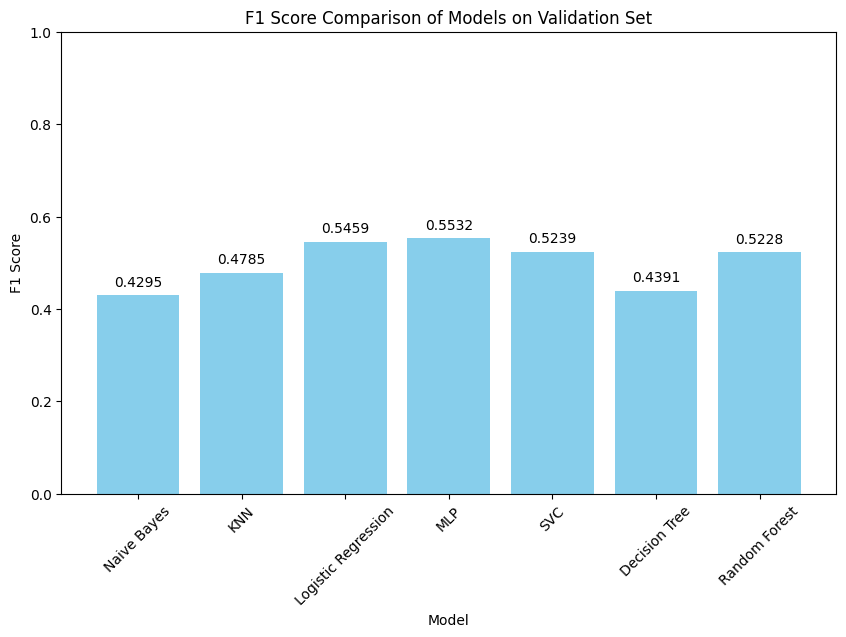

In [ ]:
# 6d

import matplotlib.pyplot as plt

# Creation of the bar plot with the F1 scores of the models
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Models on Validation Set')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # The F1 score ranges between 0 and 1

# Show F1 scores above the bars
for index, (model, f1) in enumerate(f1_scores.items()):
    plt.text(index, f1 + 0.02, f"{f1:.4f}", ha='center')

plt.show()


In [ ]:
# 7a

# Retrieve the model with the best performance
# Where best_model_name is the name of the best model from step 6c
best_model = best_classifiers[best_model_name]

# Prediction on the test set using the best model
y_test_pred_best = best_model.predict(X_test)

# Display the first 5 predictions for confirmation
print("Predictions on Test Set (first 5 samples):")
print(y_test_pred_best[:5])

Predictions on Test Set (first 5 samples):
[0 0 0 0 0]


In [ ]:
# 7b

# Retrieve the 'ID' column from the test set
test_ids = test_df['ID']

# Create a DataFrame with the predictions and the 'ID' column
output = pd.DataFrame({'ID': test_ids, 'Prediction': y_test_pred_best})

# Save the DataFrame to a CSV file
output.to_csv('final_test_predictions.csv', index=False)

print("Predictions have been saved to 'final_test_predictions.csv'.")

Predictions have been saved to 'final_test_predictions.csv'.
